<a href="https://colab.research.google.com/github/jesusvillota/Data_Science_Course/blob/main/3_1_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---

# **Data Science for Economics | Session 3**

# **3.1 Introduction to Embeddings using the *Universal Sentence Encoder***
  
<div style="text-align: center; margin-bottom: 40px;">
    <img src="https://www.cemfi.es/images/Logo-Azul.png" alt="CEMFI Logo" style="width:200px;">
</div>

### TA: Jesus Villota Miranda (jesus.villota@cemfi.edu.es)



---
---




🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥

**FIRST THING: Run the cell below!!!**

*This will save us time later (this way we can look at the theory while packages get installed in the background)*

🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥



In [ ]:
# Install the latest Tensorflow version.
!pip3 install --quiet "tensorflow>=1.7"

# Install TF-Hub.
!pip3 install --quiet tensorflow-hub
!pip3 install --quiet seaborn
!pip install scikit-learn
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=a1cd2f02929af54fe60de5654ab1cb7674c5f2152e94d42b6882dabb99ac1f23
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from langdetect import detect, LangDetectException
from sklearn.manifold import TSNE


# **Universal Sentence Encoder**

The **Universal Sentence Encoder** encodes **text** into **high-dimensional vectors** that can be used for text classification, semantic similarity, clustering and other natural language tasks.

You can think of the Universal Sentence Encoder as a mapping $USE():\text{Sentence}\longrightarrow \mathbb{R}^{512}$ whose input is variable length English text and the output is a 512 dimensional vector.

$$USE():\text{''The ECB will lower interest rates''} \mapsto \mathbf{e} $$


The model is trained and **optimized** for  ***greater-than-word* length text**, such as **sentences, phrases or short paragraphs**. It is trained on a variety of data sources and tasks with the aim of dynamically accommodating a wide variety of natural language understanding tasks.

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
docs = []
docs.append('Macroeconomics is about growth and inflation')
docs.append('Microeconomics is about individual decisions and behavior')
docs.append('Econometrics is like statistics for Economists')
docs.append('Financial markets are volative because of macroeconomic growth and individual behavior')
docs.append('The study of birds reveals a lot about nature')
docs.append('I like trees and forests')
docs.append('Birds migrate over long distances')
docs.append('Trees are homes to birds')
docs.append('Economics could be applied to tree growth. Trees are a scarce resouce so important to economics.')

We have defined a list of sentences (`docs`). Some sentences are related to economics, while others are about nature. This mix allows us to observe how the embeddings model differentiates between them.

Next, we will use the`embed` function to create embeddings for all these sentences.

Here, the embed function converts our list of sentences into a matrix where each row represents the 512-dimensional embedding of a sentence. The shape of text_embeddings is (9, 512), indicating that we have 9 sentences and each one is represented by a 512-dimensional vector.

In [ ]:
text_embeddings = embed(docs)

print(f"Since we have 9 sentences and each sentence is represented by 512 numbers, the shape of the embeddings is {text_embeddings.shape}",'\n')
print(f"The first sentence is: ['{docs[0]}'] and it is represented by the 512-dimensional vector",'\n')
print(f"{text_embeddings[0]}")

Since we have 9 sentences and each sentence is represented by 512 numbers, the shape of the embeddings is (9, 512) 

The first sentence is: ['Macroeconomics is about growth and inflation'] and it is represented by the 512-dimensional vector 

[ 0.04888899 -0.01206575  0.07643645  0.05616767 -0.07401196 -0.02054318
 -0.00753434 -0.03551985  0.04954097  0.06392787 -0.04123724  0.07968504
 -0.00962769  0.00702731 -0.03203423 -0.0724723  -0.02811924  0.06924477
 -0.02803799 -0.05837985  0.02058423 -0.01254524  0.05149558 -0.01299918
 -0.00722902  0.06959665 -0.06852734 -0.06359988 -0.07621852 -0.01912001
  0.05451993 -0.06807406  0.0759355   0.02357595 -0.05634055  0.04915914
 -0.04227557  0.02996357  0.07370432  0.00796086  0.02803538  0.03996036
 -0.06672772  0.03895953 -0.01351629 -0.05536555 -0.03466126  0.04724178
  0.00803425 -0.0366888  -0.02195881 -0.02127753 -0.04206486  0.05743781
  0.04932928  0.02364619  0.04124757  0.06515582  0.03385369  0.05918422
  0.06711007 -0.04802403 -0

# **Analyzing Text Similarity Using Embeddings and Cosine Similarity**

1) The first step is to **normalize** the embeddings. Why?...

Normalization is crucial because it adjusts the vectors to have a **unit length** (i.e., a length of 1), ensuring that cosine similarity reflects only the **direction (semantic meaning)** of the vectors, and **not their magnitude**.

*Without normalization, vectors with larger magnitudes might falsely appear more similar, simply because of their size, rather than their content*. Here, `tf.nn.l2_normalize performs this normalization along the specified axis (axis=1), which corresponds to each individual sentence embedding.

2) Next, we compute the **cosine similarity matrix** using matrix multiplication. The cosine similarity between two vectors measures the cosine of the angle between them, providing a value between -1 (completely dissimilar) and 1 (identical in direction).

We use the matrix multiplication (`tf.matmul`) of the normalized embeddings with its transpose(`transpose_b=True`) to efficiently compute pairwise cosine similarities for all embeddings.`

This results in a square matrix where each entry $[i, j]$ represents the cosine similarity between the $i-th$ and $j-th$ sentences. High values (close to 1) indicate high similarity (semantic closeness), while lower values (closer to 0) indicate low similarity.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# text_embeddings is a tensor with shape (N, 512)

# Normalize the embeddings to unit vectors
normalized_embeddings = tf.nn.l2_normalize(text_embeddings, axis=1)

# Calculate cosine similarity matrix
cosine_similarity_matrix = tf.matmul(normalized_embeddings, normalized_embeddings, transpose_b=True)

print(f"Cosine Similarity Matrix: \n\n{cosine_similarity_matrix}")

Cosine Similarity Matrix: 

[[ 1.          0.36487252  0.42747688  0.42568612  0.14122984  0.05904117
   0.06933352  0.05934881  0.39767253]
 [ 0.36487252  0.99999976  0.34505963  0.49260092  0.12082233  0.03268936
  -0.03743665  0.02922546  0.2725151 ]
 [ 0.42747688  0.34505963  1.0000001   0.2576599   0.18986475  0.07320561
   0.0537938   0.15612878  0.3689974 ]
 [ 0.42568612  0.49260092  0.2576599   1.          0.12874761 -0.01703793
   0.01223494  0.01859597  0.27007407]
 [ 0.14122984  0.12082233  0.18986475  0.12874761  0.99999976  0.1170422
   0.36651307  0.4650151   0.18987644]
 [ 0.05904117  0.03268936  0.07320561 -0.01703793  0.1170422   0.9999999
   0.02500685  0.42620128  0.32486802]
 [ 0.06933352 -0.03743665  0.0537938   0.01223494  0.36651307  0.02500685
   0.9999999   0.39539298  0.08459195]
 [ 0.05934881  0.02922546  0.15612878  0.01859597  0.4650151   0.42620128
   0.39539298  1.          0.2750323 ]
 [ 0.39767253  0.2725151   0.3689974   0.27007407  0.18987644  0.32486

To facilitate visualization, we convert the cosine similarity matrix, which is a TensorFlow tensor, into a NumPy array.

`cosine_similarity_np = cosine_similarity_matrix.numpy()`

NumPy arrays are more compatible with Python's plotting libraries, such as Matplotlib and Seaborn, allowing us to visualize the data effectively.

Finally, we use Seaborn to create a heatmap of the cosine similarity matrix. The heatmap provides a visual representation of the similarity scores between all pairs of sentences:

- The x-axis and y-axis represent the indices of the sentences in our list.
- The color intensity indicates the level of similarity, with **BRIGHTER colors (yellow in the viridis colormap)** indicating **HIGHER similarity** and **DARKER colors (blue) indicating LOWER similarity**.
- This visual tool allows us to quickly identify which sentences are semantically close to each other.

For example, sentences about similar topics, such as economics, should have higher similarity scores with each other than with sentences about unrelated topics like nature.

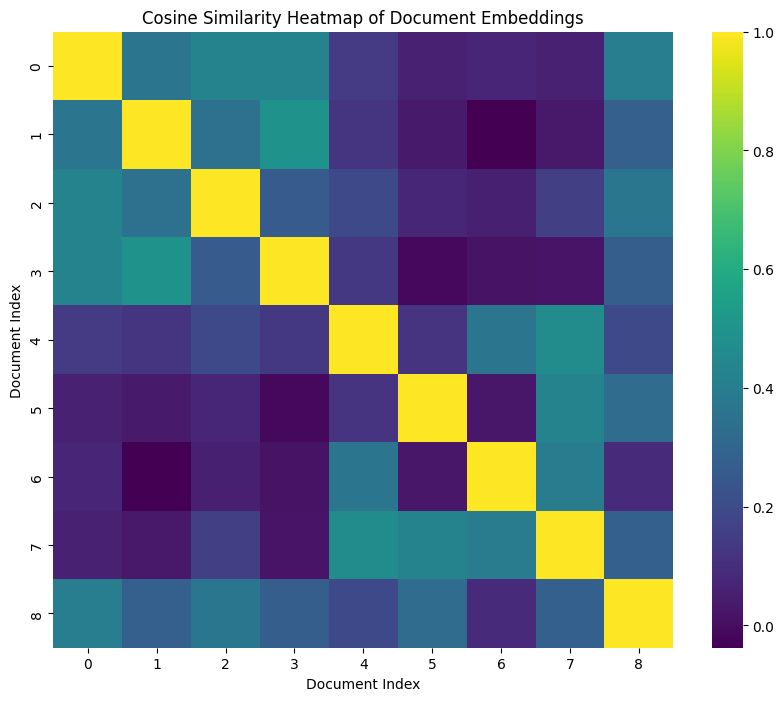

In [ ]:
# Convert the tensor to a numpy array for plotting
cosine_similarity_np = cosine_similarity_matrix.numpy()

# Plotting the heatmap of Document Embeddings
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarity_np, cmap='viridis', annot=False)
plt.title('Cosine Similarity Heatmap of Document Embeddings')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()


# **Visualizing Embeddings**

We will visualize embeddings using t-SNE (t-Distributed Stochastic Neighbor Embedding), a popular technique for dimensionality reduction and visualization of high-dimensional data  in lower dimensions (typically 2D or 3D).

The **perplexity** parameter in t-SNE balances the attention given to local and global aspects of the data. It can be thought of as a smooth measure of the number of nearest neighbors to consider when positioning points.

### **What is Perplexity in t-SNE?**

Perplexity can be thought of as a measure that balances attention between local and global aspects of your data.

- In simpler terms, perplexity is akin to the **number of nearest neighbors** that t-SNE considers when positioning a point in the low-dimensional space. This influences how the algorithm balances between focusing on local structure versus global structure when arranging points in a lower-dimensional space.

- Mathematically, perplexity is related to the **Gaussian distribution used in t-SNE to model distances between points in high-dimensional space**. A higher perplexity means that t-SNE will consider a larger number of points as neighbors, focusing more on preserving global structure. Conversely, a lower perplexity focuses more on preserving the local structure, where only the closest neighbors are considered significant.

- Perplexity influences the way t-SNE visualizes data by determining the balance between focusing on local versus global relationships:

  - **Local Structure**: Low perplexity values (closer to 5 or 10) make t-SNE focus on preserving the local relationships between points. This is useful when the primary interest is in understanding small, tight clusters within the data.

  - **Global Structure**: Higher perplexity values (closer to 30 or 50) make t-SNE focus more on the overall data structure. This is useful when it's important to see broader groupings and relationships between different clusters.

### **Modus Operandi**

1) Initialize t-SNE with `n_components=2` to reduce the embeddings to two dimensions, which can be easily plotted. The `random_state is set to 0 to ensure reproducibility, and we use the previously defined perplexity_value.

2) Create a `scatter` plot to visualize the reduced 2D embeddings. Each point on the plot represents a document, and the distances between points indicate how similar or dissimilar the documents are based on their semantic content.

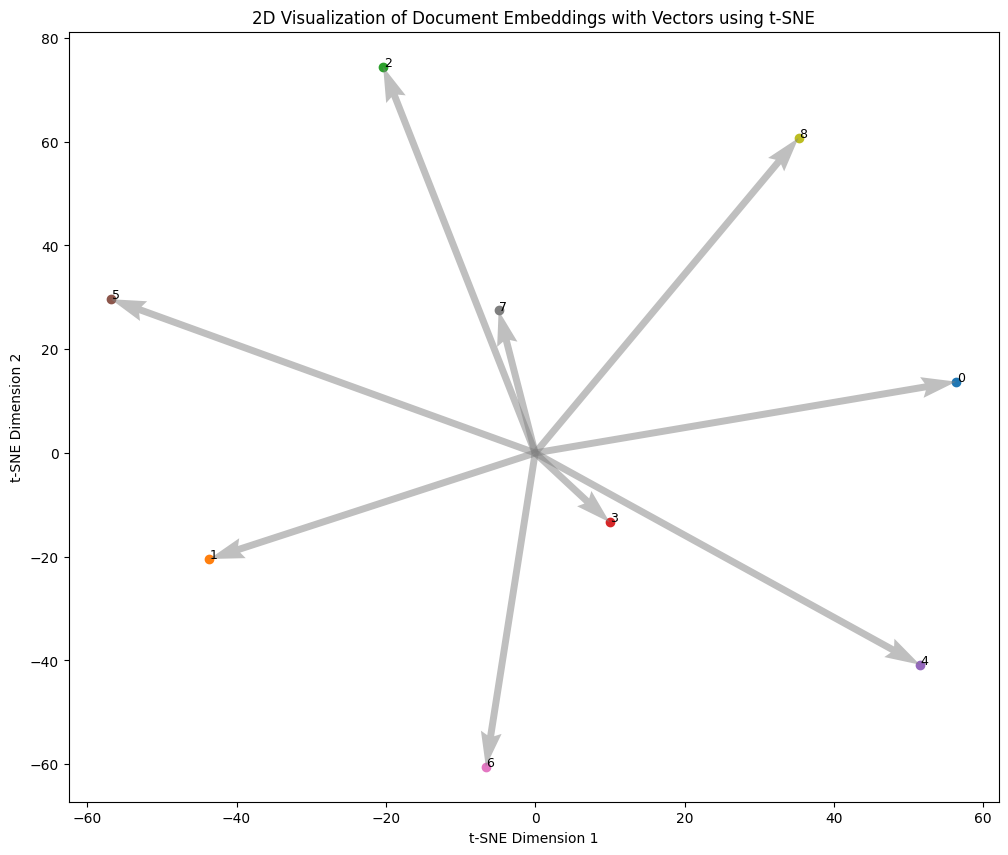

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# text_embeddings is a NumPy array with shape (N, 512)
# If text_embeddings is a TensorFlow tensor, convert it to a NumPy array using text_embeddings.numpy()
if isinstance(text_embeddings, tf.Tensor):
    text_embeddings = text_embeddings.numpy()

# Set perplexity to a value less than the number of samples (N)
# You might need to adjust this based on your dataset
perplexity_value = min(30, len(text_embeddings) - 1)  # Adjust perplexity based on your dataset size

# Initialize t-SNE with 2 components for 2D visualization
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)

# Reduce dimensions
reduced_embeddings_2d = tsne.fit_transform(text_embeddings)

# Plotting the 2D scatter plot with vectors pointing to each document
plt.figure(figsize=(12, 10))

# Scatter plot for each point in 2D space
for i, (x, y) in enumerate(reduced_embeddings_2d):
    plt.scatter(x, y, label=f'Doc {i}')
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5)

# Add labels for each point
for i, (x, y) in enumerate(reduced_embeddings_2d):
    plt.text(x + 0.1, y + 0.1, str(i), fontsize=9)  # Adjust text positioning and size as needed

# Set plot title and labels
plt.title('2D Visualization of Document Embeddings with Vectors using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.show()


# **3D Visualization of Embeddings**

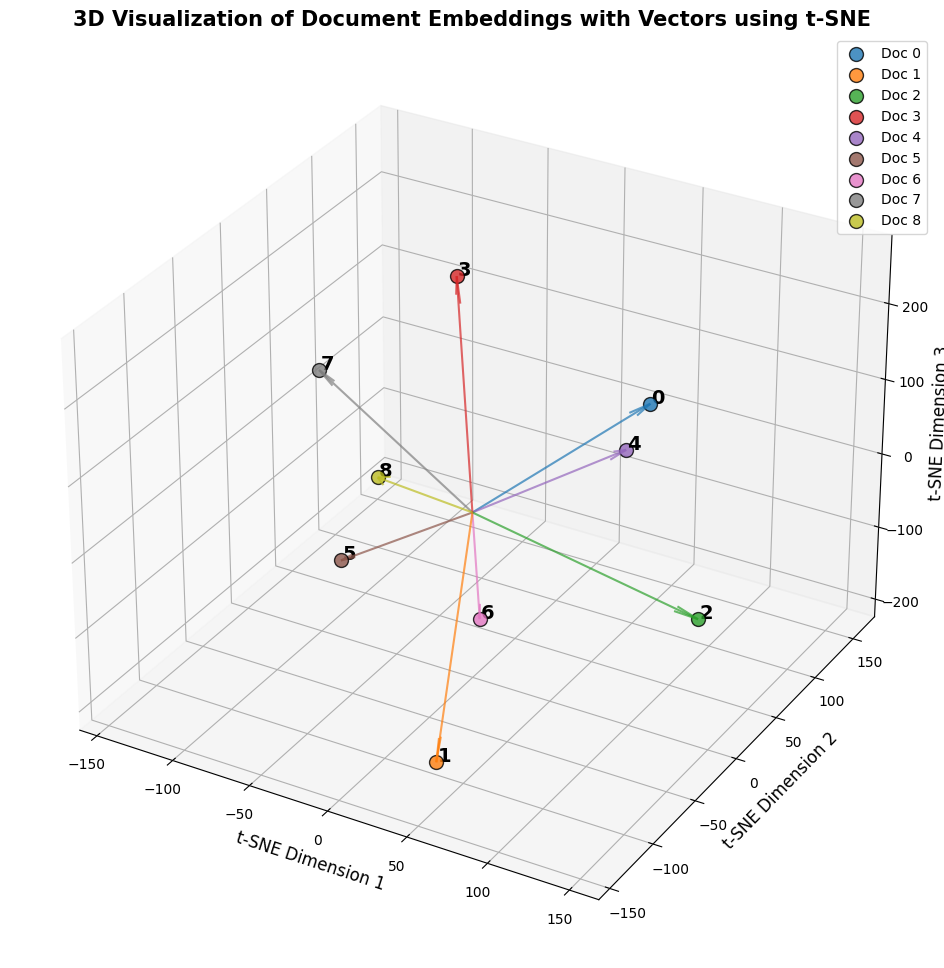

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.colors as mcolors

# Assuming text_embeddings is a NumPy array with shape (N, 512)
# If text_embeddings is a TensorFlow tensor, convert it to a NumPy array using text_embeddings.numpy()
if isinstance(text_embeddings, tf.Tensor):
    text_embeddings = text_embeddings.numpy()

# Set perplexity to a value less than the number of samples (N)
# You might need to adjust this based on your dataset
perplexity_value = min(30, len(text_embeddings) - 1)  # Adjust perplexity based on your dataset size

# Initialize t-SNE with 3 components for 3D visualization
tsne = TSNE(n_components=3, random_state=0, perplexity=perplexity_value)

# Reduce dimensions
reduced_embeddings_3d = tsne.fit_transform(text_embeddings)

# Create a colormap
colors = list(mcolors.TABLEAU_COLORS.values())
num_points = len(reduced_embeddings_3d)

# Plotting the 3D scatter plot with vectors pointing to each document
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Enhance visualization with better color scheme and vector representation
for i, (x, y, z) in enumerate(reduced_embeddings_3d):
    ax.scatter(x, y, z, color=colors[i % len(colors)], s=100, edgecolor='k', label=f'Doc {i}', alpha=0.8)
    ax.quiver(0, 0, 0, x, y, z, color=colors[i % len(colors)], arrow_length_ratio=0.1, alpha=0.7, linewidth=1.5)

# Add labels for each point with a larger font size and more offset for better readability
for i, (x, y, z) in enumerate(reduced_embeddings_3d):
    ax.text(x + 0.5, y + 0.5, z + 0.5, str(i), fontsize=14, color='black', weight='bold')

# Set plot title and labels
ax.set_title('3D Visualization of Document Embeddings with Vectors using t-SNE', fontsize=15, weight='bold')
ax.set_xlabel('t-SNE Dimension 1', fontsize=12)
ax.set_ylabel('t-SNE Dimension 2', fontsize=12)
ax.set_zlabel('t-SNE Dimension 3', fontsize=12)

# Add a legend to identify each document
ax.legend(loc='upper right', fontsize=10)

# Improve aesthetics by adjusting the grid and background
ax.grid(True)
ax.set_facecolor('white')

# Show plot
plt.show()




---
---


# **Hands-On Application: ECB Speeches**

Now let's analyze the vector embeddings of ECB speeches



In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [34]:
#data = pd.read_csv('/content/gdrive/My Drive/CEMFI_course/all_ECB_speeches.csv', error_bad_lines=False)
the_folder = '/content/gdrive/My Drive/'
file = the_folder + 'all_ECB_speeches.csv'
the_text = pd.read_table(file, delimiter='|')
#drop missings
the_text = the_text.dropna()
#print first rows
the_text

,date,speakers,title,subtitle,contents
1,2020-12-16,Isabel Schnabel,The importance of trust for the ECB’s monetary...,"Speech by Isabel Schnabel, Member of the Execu...",SPEECH The importance of trust for the ECB’s...
2,2020-12-16,Fabio Panetta,Keeping cyber risk at bay: our individual and ...,"Introductory remarks by Fabio Panetta, Member ...",SPEECH Keeping cyber risk at bay: our indivi...
4,2020-12-14,Isabel Schnabel,Welcome address,"Welcome address by Isabel Schnabel, Member of ...",SPEECH Welcome address Welcome address by Is...
5,2020-12-14,Fabio Panetta,A commitment to the recovery,"Speech by Fabio Panetta, Member of the Executi...",SPEECH A commitment to the recovery Speech...
6,2020-11-27,Fabio Panetta,From the payments revolution to the reinventio...,"Speech by Fabio Panetta, Member of the Executi...",SPEECH From the payments revolution to the ...


# **Preprocessing**

**`detect_language` function:**
- This function uses the detect function from the langdetect library to identify the language of a given text string.
- The`try` block attempts to detect the language
- The `except` block catches any LangDetectException errors (which occur if the text is too short or otherwise indeterminable), returning None in such cases.

**`str.replace('SPEECH', '', 1)`**

- This removes the first occurrence of the word "SPEECH" from the 'contents' column in each row of the dataframe.
- The argument 1 specifies that only the first occurrence should be replaced. - This step is performed to clean up the text for more accurate language detection and subsequent text analysis.

**`apply(detect_language)`**:
- The apply method applies the detect_language function to each entry in the 'contents' column.
- This results in a new column, 'language', which contains the detected language for each speech.


**`the_text[the_text['language'] == 'en']`**
- This command filters for English speeches only.
- This step ensures that the dataset contains only English-language speeches, which is often necessary for consistent analysis, particularly in NLP.

In [37]:
# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return None  # In case the language detection fails

# Step 1: Remove the first occurrence of 'SPEECH'
the_text['contents'] = the_text['contents'].str.replace('SPEECH', '', 1)

# Step 2: Detect language and filter for English
the_text['language'] = the_text['contents'].apply(detect_language)
the_text = the_text[the_text['language'] == 'en']

# Optional: Drop the 'language' column if you no longer need it
the_text.drop(columns=['language'], inplace=True)


<ipython-input-37-722a1934ffb8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_text.drop(columns=['language'], inplace=True)


In [ ]:
the_text

# **Batch Processing for Text Embeddings**

This code snippet demonstrates how to efficiently compute embeddings for a large list of text documents using a batch processing approach. The goal is to avoid memory issues and ensure smooth computation when working with a potentially large dataset of textual content.

### **1. Batch Processing Function Definition**

The `batch_embed` function is designed to handle the embedding of text data in manageable batches, which helps in avoiding memory overload and ensures efficient computation.
- **Parameters**:
  - `text_list`: A list of text documents to be embedded.
  - `embed_function`: The function used to compute embeddings (e.g., a pre-trained model like the Universal Sentence Encoder).
  - `batch_size`: The number of documents to process in each batch (default is 100).
  
`embeddings_list` is initialized as an empty list to store the computed embeddings for each batch, which will be combined later.

### **2. Processing Text in Batches**

The loop iterates over the `text_list` in steps of `batch_size`. For each iteration:
- **Extract a Batch**: A batch of text documents is extracted using slicing.
- **Compute Embeddings**: The `embed_function` is applied to the batch to compute its embeddings, processing a limited number of documents at a time to save memory.
- **Store Embeddings**: The computed embeddings for the batch are appended to `embeddings_list`.
- **`print(i)`**: Prints the current index (`i`) to track progress during processing. This is useful for debugging and monitoring large datasets.

### **3. Combining Batch Embeddings into a Single Array**

After all batches have been processed, the `np.vstack` function vertically stacks (concatenates) all the individual batch embeddings into a single NumPy array. This provides a complete set of embeddings for all the text documents in the original list.

### **4. Usage of the Batch Embedding Function**

Convert the pandas Series of text documents into a Python list using `tolist()`, which is the format expected by the `batch_embed` function. The function is then called with the list of text documents, the embedding function (`embed`), and a specified batch size (100 in this case). The resulting embeddings are stored in the `embeddings` variable.

### **Why Use Batch Processing?**

- **Memory Efficiency**: Processing large datasets in batches prevents memory overload by limiting the number of documents processed at once.
- **Improved Performance**: Batch processing can also improve computation speed by leveraging vectorized operations within each batch.
- **Scalability**: This approach allows for handling large-scale datasets that would otherwise be infeasible to process in a single step due to memory constraints.

By using batch processing, this code efficiently computes embeddings for large text datasets, making it suitable for various natural language processing tasks, such as clustering, classification, or semantic analysis.


In [38]:
# Step 1: Calculate embeddings
#embeddings = embed(the_text['contents'][0:1000].tolist())
#embeddings = embed(the_text['contents'].tolist())
import numpy as np
import pandas as pd

# Assuming embed is the embedding function, and the_text['contents'] contains the list of text
def batch_embed(text_list, embed_function, batch_size=100):
    embeddings_list = []

    # Process in batches
    for i in range(0, len(text_list), batch_size):
        # Get the batch
        batch = text_list[i:i+batch_size]
        # Embed the batch
        batch_embeddings = embed_function(batch)
        # Collect embeddings
        embeddings_list.append(batch_embeddings)

        print(i)

    # Combine all embeddings back into a single array
    return np.vstack(embeddings_list)

# Usage
contents = the_text['contents'].tolist()

# Embed the contents in batches
embeddings = batch_embed(contents, embed, batch_size=100)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


# **Visualizing Speech Embeddings by Speaker Using t-SNE**

This code snippet demonstrates how to visualize high-dimensional speech embeddings in a two-dimensional space using t-Distributed Stochastic Neighbor Embedding (t-SNE). The visualization distinguishes between different speakers by using unique colors and markers, making it easier to observe patterns and clusters in the data.


### **1. Initializing t-SNE**

`t-SNE` is initialized with `n_components=2` to reduce the high-dimensional embeddings to two dimensions, suitable for 2D plotting. The `random_state=0` ensures that the results are reproducible, and `perplexity=perplexity_value` determines the balance between local and global data structure in the dimensionality reduction process.

### **2. Performing t-SNE Dimensionality Reduction**

The `fit_transform` method applies t-SNE to the embeddings, reducing their dimensionality from high-dimensional space to 2D space. The resulting `reduced_embeddings` array contains the 2D coordinates of each embedding, which will be plotted.

### **3. Extracting Unique Speakers**

The code retrieves a list of unique speaker names from the `the_text['speakers']` column. This is used to assign a unique color and marker to each speaker in the plot, helping distinguish between them visually.

### **4. Mapping Speakers to Colors and Markers**

Two dictionaries are created:
- `speaker_color_map` maps each unique speaker to a specific color from the palette.
- `speaker_marker_map` maps each speaker to a specific marker shape. The use of modulo (`%`) ensures that if there are more speakers than available colors or markers, the palette and markers will repeat.

### **5. Creating the Plot**

A figure is created with a specified size (`12 x 10` inches) to provide ample space for plotting and to accommodate the legend without overlapping.

The loop iterates over each 2D embedding and plots it using `plt.scatter` with a unique color and marker for each speaker. Labels are added only if the speaker is not already present in the legend, avoiding duplicate labels.

`plt.tight_layout()` adjusts the plot parameters to give some padding and prevent overlap of elements. `plt.show()` displays the final plot, allowing visual inspection of the embeddings with clear distinctions between speakers.

### **Purpose of This Visualization**

This visualization helps to:
- **Identify Clusters**: By reducing the dimensionality of embeddings to 2D, clusters of similar speeches (by content or style) can be visually identified.
- **Distinguish Between Speakers**: Different speakers are easily distinguishable by color and marker shape, facilitating comparative analysis.
- **Understand Data Structure**: t-SNE provides insights into the structure of the high-dimensional embedding space, revealing both local (nearby points) and global (overall distribution) structures in the data.


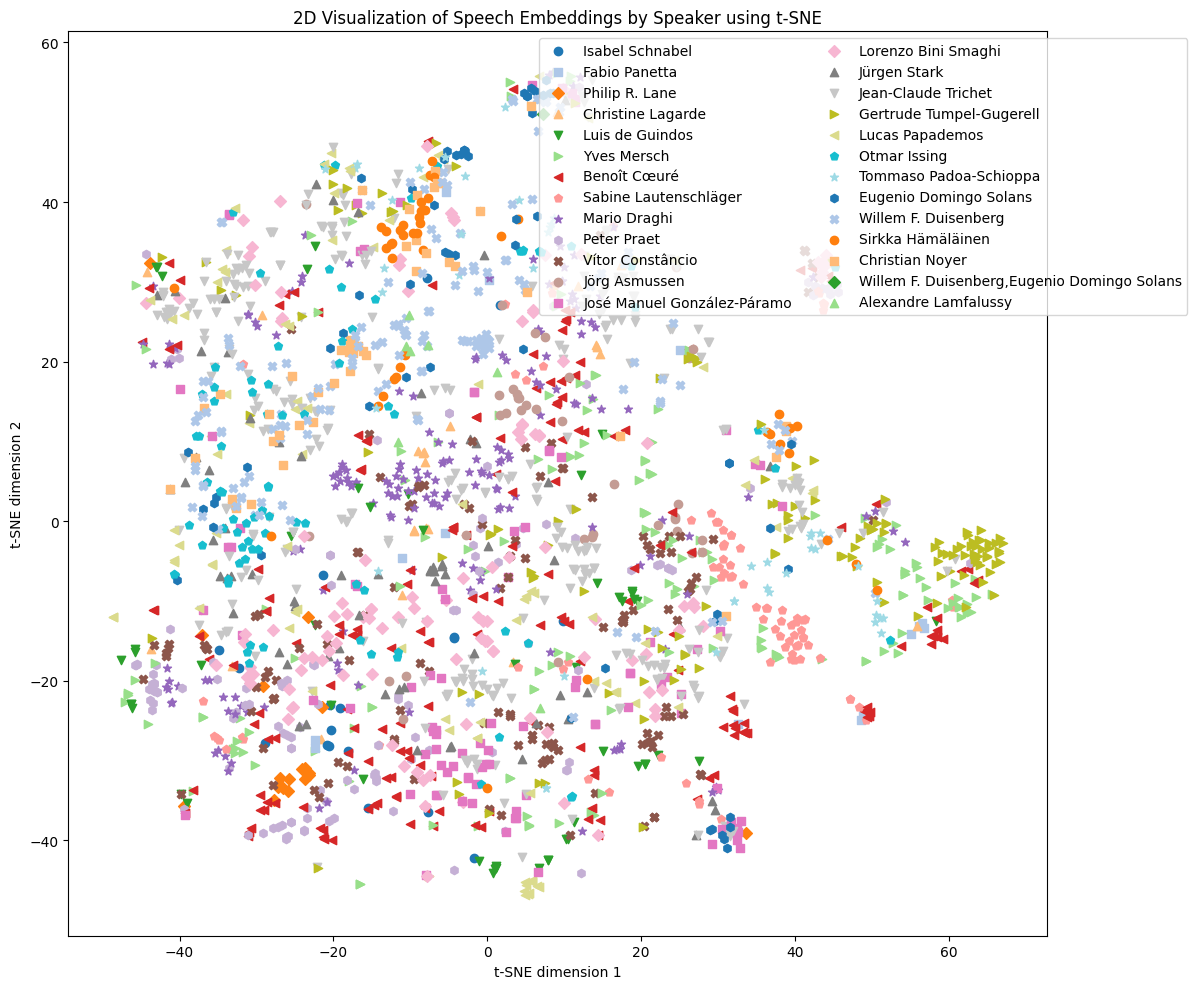

In [39]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

# Define the perplexity based on your dataset size
perplexity_value = min(30, len(embeddings) - 1)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)

# Perform t-SNE dimensionality reduction
reduced_embeddings = tsne.fit_transform(embeddings)

# Get a list of unique speakers
unique_speakers = the_text['speakers'].unique()

# Use Seaborn to create a wide color palette
palette = sns.color_palette("tab20", len(unique_speakers))  # Wider range of distinct colors

# Define a set of marker shapes to use
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'X']

# Create a dictionary mapping each speaker to a color and a marker
speaker_color_map = {speaker: palette[i % len(palette)] for i, speaker in enumerate(unique_speakers)}
speaker_marker_map = {speaker: markers[i % len(markers)] for i, speaker in enumerate(unique_speakers)}

# Create the plot
plt.figure(figsize=(12, 10))

# Plot each point, with unique color and marker for each speaker
for i, (x, y) in enumerate(reduced_embeddings):
    speaker = the_text['speakers'].iloc[i]
    plt.scatter(x, y, color=speaker_color_map[speaker], marker=speaker_marker_map[speaker], label=speaker if speaker not in plt.gca().get_legend_handles_labels()[1] else "")

# Add labels and title
plt.title('2D Visualization of Speech Embeddings by Speaker using t-SNE')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')

# Add a legend to show the speaker names, colors, and markers
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2)

# Show plot
plt.tight_layout()
plt.show()

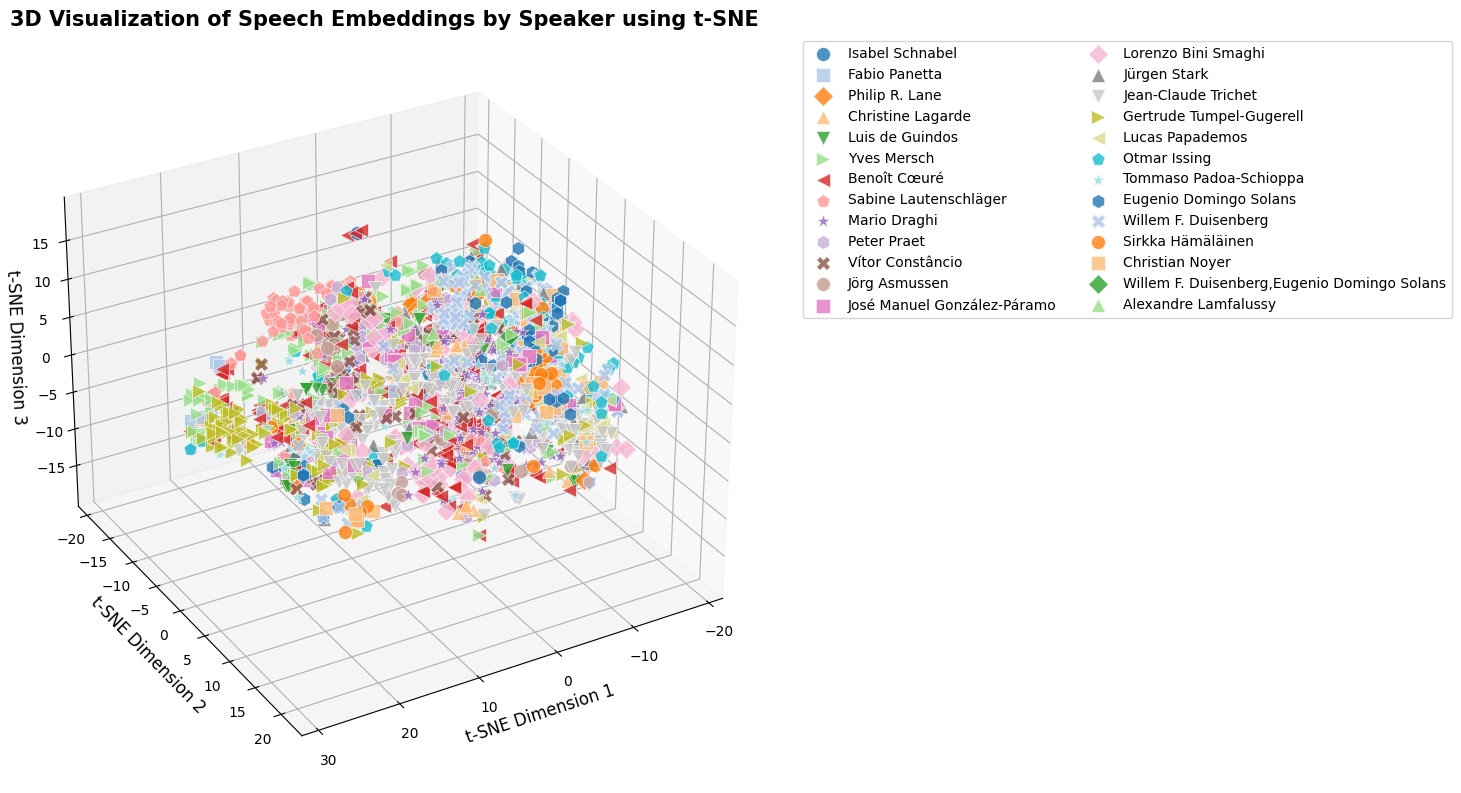

In [40]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the perplexity based on your dataset size
perplexity_value = min(30, len(embeddings) - 1)

# Initialize t-SNE with 3 components for 3D visualization
tsne = TSNE(n_components=3, random_state=0, perplexity=perplexity_value)

# Perform t-SNE dimensionality reduction
reduced_embeddings_3d = tsne.fit_transform(embeddings)

# Get a list of unique speakers
unique_speakers = the_text['speakers'].unique()

# Use Seaborn to create a wide color palette
palette = sns.color_palette("tab20", len(unique_speakers))  # Wider range of distinct colors

# Define a set of marker shapes to use
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'X']

# Create a dictionary mapping each speaker to a color and a marker
speaker_color_map = {speaker: palette[i % len(palette)] for i, speaker in enumerate(unique_speakers)}
speaker_marker_map = {speaker: markers[i % len(markers)] for i, speaker in enumerate(unique_speakers)}

# Create the 3D plot
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot each point with unique color and marker for each speaker
for i, (x, y, z) in enumerate(reduced_embeddings_3d):
    speaker = the_text['speakers'].iloc[i]
    ax.scatter(x, y, z, color=speaker_color_map[speaker], marker=speaker_marker_map[speaker],
               s=100, alpha=0.8, edgecolor='w', linewidth=0.5,
               label=speaker if speaker not in plt.gca().get_legend_handles_labels()[1] else "")

# Add labels and title
ax.set_title('3D Visualization of Speech Embeddings by Speaker using t-SNE', fontsize=15, weight='bold')
ax.set_xlabel('t-SNE Dimension 1', fontsize=12)
ax.set_ylabel('t-SNE Dimension 2', fontsize=12)
ax.set_zlabel('t-SNE Dimension 3', fontsize=12)

# Add a legend to show the speaker names, colors, and markers
handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2, fontsize=10)

# Improve aesthetics by adjusting grid, background, and view angle
ax.grid(True)
ax.set_facecolor('white')
ax.view_init(30, 60)  # Set a good initial viewing angle

# Tight layout and show plot
plt.tight_layout()
plt.show()


In [44]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import seaborn as sns

# Define the perplexity based on your dataset size
perplexity_value = min(30, len(embeddings) - 1)

# Initialize t-SNE with 3 components for 3D visualization
tsne = TSNE(n_components=3, random_state=0, perplexity=perplexity_value)

# Perform t-SNE dimensionality reduction
reduced_embeddings_3d = tsne.fit_transform(embeddings)

# Get a list of unique speakers
unique_speakers = the_text['speakers'].unique()

# Use Seaborn to create a wide color palette
palette = sns.color_palette("tab20", len(unique_speakers))
colors = [palette[i % len(palette)] for i in range(len(unique_speakers))]

# Create a dictionary mapping each speaker to a color
speaker_color_map = {speaker: f'rgba({int(c[0]*255)}, {int(c[1]*255)}, {int(c[2]*255)}, 0.8)' for speaker, c in zip(unique_speakers, colors)}

# Define valid marker symbols recognized by Plotly's Scatter3d
valid_markers = ['circle', 'circle-open', 'cross', 'diamond', 'diamond-open', 'square', 'square-open', 'x']

# Create the interactive 3D plot
fig = go.Figure()

# Add scatter points for each speaker
for i, speaker in enumerate(unique_speakers):
    speaker_points = reduced_embeddings_3d[the_text['speakers'] == speaker]
    fig.add_trace(go.Scatter3d(
        x=speaker_points[:, 0],
        y=speaker_points[:, 1],
        z=speaker_points[:, 2],
        mode='markers',
        marker=dict(
            size=6,
            color=speaker_color_map[speaker],
            symbol=valid_markers[i % len(valid_markers)]  # Use only valid marker symbols
        ),
        name=speaker
    ))

# Update layout for a prettier and interactive 3D plot
fig.update_layout(
    title='Interactive 3D Visualization of Speech Embeddings by Speaker using t-SNE',
    scene=dict(
        xaxis=dict(title='t-SNE Dimension 1'),
        yaxis=dict(title='t-SNE Dimension 2'),
        zaxis=dict(title='t-SNE Dimension 3')
    ),
    legend=dict(x=0, y=1),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the interactive plot
fig.show()


**Filtering to keep only those Speakers with at least 3 speeches**

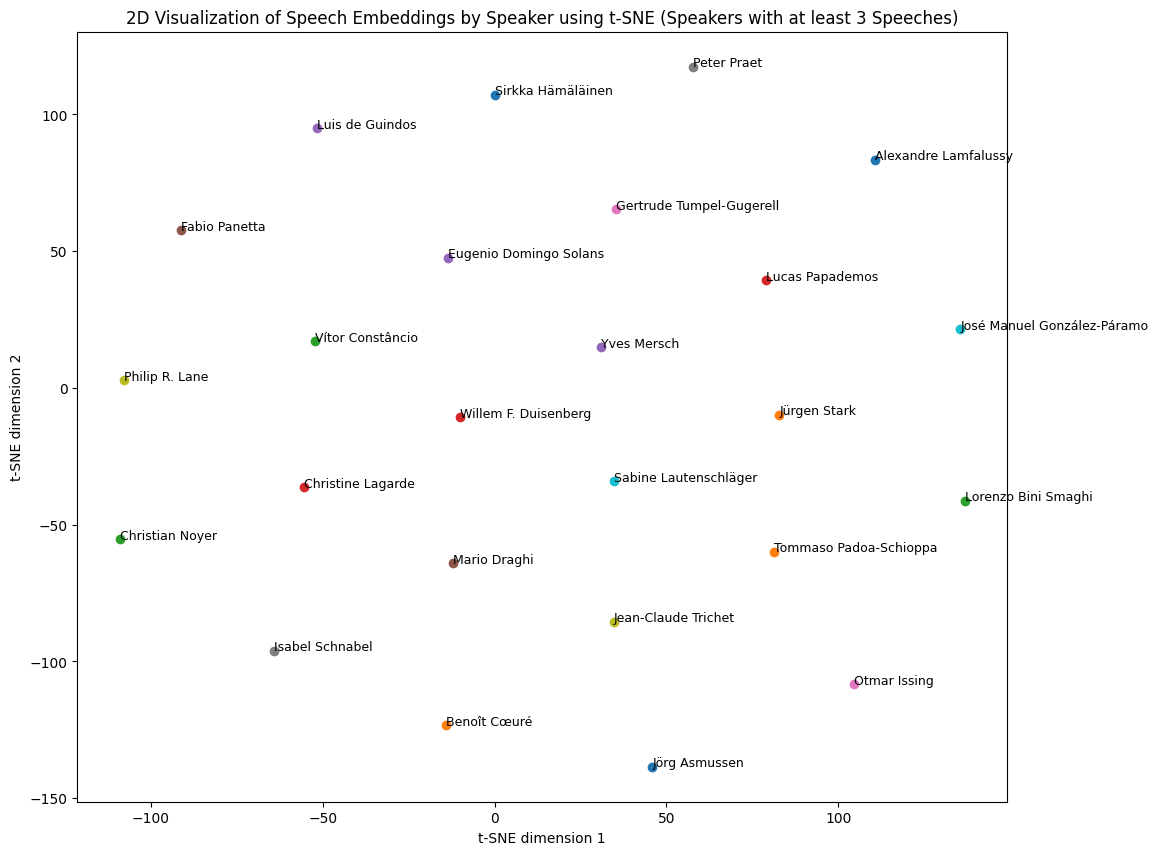

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming embeddings is already a NumPy array
# Directly create a DataFrame without .numpy() since embeddings is not a TensorFlow tensor
embeddings_df = pd.DataFrame(embeddings, index=the_text.index)  # Assuming the embeddings correspond to the same index as the_text

# Step 1: Inner Merge embeddings with the_text
merged_df = pd.merge(the_text, embeddings_df, left_index=True, right_index=True, how='inner')

# Step 2: Filter speakers with at least 3 speeches
# Count the number of speeches per speaker
speaker_counts = merged_df['speakers'].value_counts()

# Filter speakers with at least 3 speeches
valid_speakers = speaker_counts[speaker_counts >= 3].index
filtered_df = merged_df[merged_df['speakers'].isin(valid_speakers)]

# Ensure you're working with numeric columns (excluding non-numeric, e.g., 'speakers')
numeric_columns = filtered_df.select_dtypes(include=[np.number]).columns

# Step 3: Group by speaker and take the mean of the numeric embeddings
mean_embeddings_by_speaker = filtered_df.groupby('speakers')[numeric_columns].mean()

# Step 4: t-SNE transformation on mean embeddings
perplexity_value = min(30, len(mean_embeddings_by_speaker) - 1)  # Adjust perplexity based on dataset size

# Initialize t-SNE with the adjusted perplexity
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)

# Fit and transform the mean embeddings
reduced_embeddings = tsne.fit_transform(mean_embeddings_by_speaker)

# Step 5: Plotting the 2D t-SNE result
plt.figure(figsize=(12, 10))
speakers = mean_embeddings_by_speaker.index  # Get the speaker names from the index
for i, (x, y) in enumerate(reduced_embeddings):
    plt.scatter(x, y)
    plt.text(x + 0.0003, y + 0.0003, speakers[i], fontsize=9)  # Adjust text positioning and size as needed

# Add labels and title
plt.title('2D Visualization of Speech Embeddings by Speaker using t-SNE (Speakers with at least 3 Speeches)')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')

# Show the plot
plt.show()

In [46]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import seaborn as sns

# Assuming embeddings is already a NumPy array
# Directly create a DataFrame without .numpy() since embeddings is not a TensorFlow tensor
embeddings_df = pd.DataFrame(embeddings, index=the_text.index)  # Assuming the embeddings correspond to the same index as the_text

# Step 1: Inner Merge embeddings with the_text
merged_df = pd.merge(the_text, embeddings_df, left_index=True, right_index=True, how='inner')

# Step 2: Filter speakers with at least 3 speeches
# Count the number of speeches per speaker
speaker_counts = merged_df['speakers'].value_counts()

# Filter speakers with at least 3 speeches
valid_speakers = speaker_counts[speaker_counts >= 3].index
filtered_df = merged_df[merged_df['speakers'].isin(valid_speakers)]

# Ensure you're working with numeric columns (excluding non-numeric, e.g., 'speakers')
numeric_columns = filtered_df.select_dtypes(include=[np.number]).columns

# Step 3: Group by speaker and take the mean of the numeric embeddings
mean_embeddings_by_speaker = filtered_df.groupby('speakers')[numeric_columns].mean()

# Step 4: t-SNE transformation on mean embeddings
perplexity_value = min(30, len(mean_embeddings_by_speaker) - 1)  # Adjust perplexity based on dataset size

# Initialize t-SNE with the adjusted perplexity for 3D visualization
tsne = TSNE(n_components=3, random_state=0, perplexity=perplexity_value)

# Fit and transform the mean embeddings
reduced_embeddings_3d = tsne.fit_transform(mean_embeddings_by_speaker)

# Step 5: Plotting the 3D t-SNE result with Plotly
fig = go.Figure()

# Use Seaborn to create a wide color palette
palette = sns.color_palette("tab20", len(mean_embeddings_by_speaker))
colors = [f'rgba({int(c[0]*255)}, {int(c[1]*255)}, {int(c[2]*255)}, 0.8)' for c in palette]

# Add scatter points for each speaker with unique colors
speakers = mean_embeddings_by_speaker.index  # Get the speaker names from the index
for i, speaker in enumerate(speakers):
    x, y, z = reduced_embeddings_3d[i]
    fig.add_trace(go.Scatter3d(
        x=[x],
        y=[y],
        z=[z],
        mode='markers+text',
        marker=dict(size=8, color=colors[i]),
        text=[speaker],
        textposition='top center',
        name=speaker  # This ensures that the legend shows speaker names
    ))

# Update layout for a prettier and interactive 3D plot
fig.update_layout(
    title='3D Visualization of Speech Embeddings by Speaker using t-SNE (Speakers with at least 3 Speeches)',
    scene=dict(
        xaxis=dict(title='t-SNE Dimension 1'),
        yaxis=dict(title='t-SNE Dimension 2'),
        zaxis=dict(title='t-SNE Dimension 3')
    ),
    legend=dict(x=0, y=1),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the interactive plot
fig.show()
